# Twitter Sentiment: Climate Change Belief Analysis
## GROUP 3: Advanced Classification Predict

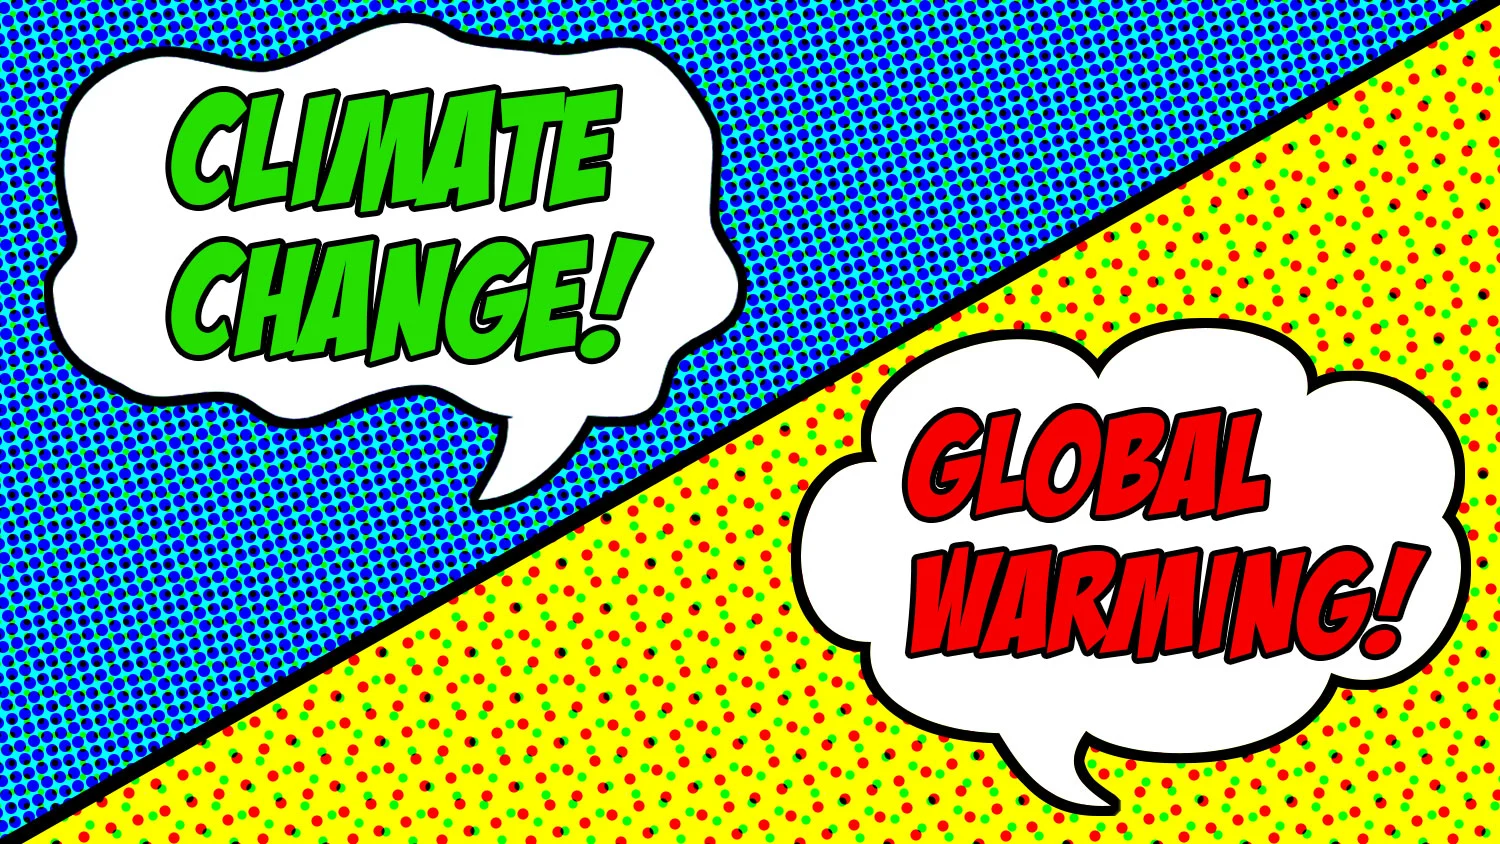


# Introduction 
Several companies are built around lessening one’s environmental impact or carbon footprint. This is because they offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we have created a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. This model together will the accompanying app will help Geo-Environmental Consultation companies who are turning to social media to obtain valuable information about job applicants and to monitor the activities of their employees in relation to the values they have towards the company's projects and beliefs surrounding the ever changing global environment.

Providing an accurate and robust solution to this task will provide access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. The app launched on **streamlit** is also an intuitive, easy to use, simple and the customer can rely on the product it.

## Table of Contents

1. Intro to Comet
2. Importing Libraries
3. Importing Dataset
4. Data Preprocessing
5. Exploratory Data Analysis
6. Modelling
7. Submission
8. Conclusion

## 1. Comet 

Comet is a a tool used for model versioning and experimentation as it records the parameters and conditions from each conducted experiements. Comet allows for reproducing of results, and/or going back to a previous version of the experiment.

In [1]:
# Loading in the comet_ml tool
import comet_ml
from comet_ml import Experiment
    
# Setting the API key, saved as environment variable 
experiment = Experiment(api_key="rM58GcqGdalxz1EMaEbojqveD",
    project_name="general", workspace="munangiwa",)
experiment.display()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\Munangiwa\\OneDrive - University of Witwatersrand\\try' and lookings in parents. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/munangiwa/general/285c70dbc0a04dc680db09729cc57232



# 2. Loading Libraries
All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are the most commonly used libraries. Numpy is required for calculations like mean, median, square roots, etc. Pandas is used for data processing and data frames. We choose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

In [2]:
# Only excecute this once to load comet into your enviroment
#!pip install comet_ml

In [3]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool

import requests
import io

# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import time
import timeit
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

# Quality of all figures in notebook
mpl.rcParams['figure.dpi'] = 180

# NLP Libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from imblearn.under_sampling import InstanceHardnessThreshold

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# 3. Loading Dataset
Pandas module used for inporting dataset 
<br>In read_csv() function, we have passed the location to where the files are located in the dphi official github page

In [4]:
# In read_csv() function, we have passed the location to where the files are located in the official github page.
url = "https://github.com/drikus-d/classification-predict-streamlit-template/blob/master/resources/train.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
train_data = pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://github.com/drikus-d/classification-predict-streamlit-template/blob/master/resources/test_with_no_labels.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
test_data = pd.read_csv(io.StringIO(download.decode('utf-8')))


# Printing out the first 5 rows of the dataframe
print (train_data.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954


# 4. Data Preprocessing

## Basic EDA: Summary Statistics

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


From the above it's clear that we don't have missing values, with 15819 rows of data, with 3 columns. 
<br>**Sentiment** and **tweetID** are integers 
<br>**message** (the tweet) is an object (String type) 

In [6]:
# Shape of the dataset
train_data.shape

(15819, 3)

In [7]:
# Looking at the numbers of possible classes in our sentiment
train_data['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

The tweets sentiments are divided into four (4) classes:

*  [ 2 ] - News: tweets links to factual news about climate change
*  [ 1 ] - Pro: tweets that supports the belief of man-made climate change
*  [ 0 ] - Neutral: tweets that neither support nor refutes the belief of man-made climate change
*  [-1 ] - Anti (Negative): tweets that does not believe in man-made climate change

In [8]:
# Looking at the how the messages are distributed across the sentiment
train_data.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


## Missing values

In [9]:
# Checking for missing values
train_data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Fortunately, there are no missing values in our dataset.

In [10]:
# Checking whether a character is white-space character or not
print(len(train_data['message']))
print(sum(train_data['message'].apply(lambda x: x.isspace())))

15819
0


In [11]:
# Sample tweet
tweet = train_data.iloc[4,1]
print(tweet)

RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight


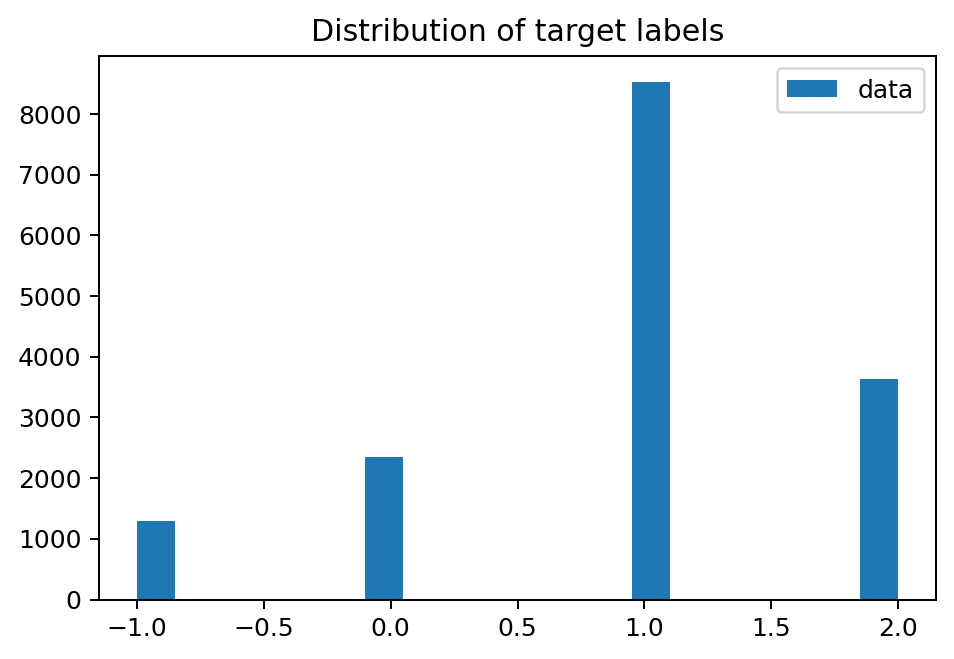

In [12]:
# Visualizing the distribution of the target 
plt.hist(train_data['sentiment'], label='data', bins=20);
plt.legend();
plt.title('Distribution of target labels')
plt.show()

An imbalance of classes occurs in the in the dataset. There is a lot more ofthe '1' sentiment relative to the rest. This disproportionate ratio of observations in each class is common in mascine learning. This can cause problems as most algorithms are designed to maximize accuracy and reduce error. Therefore we will address and take care of the class imbalance in our EDA

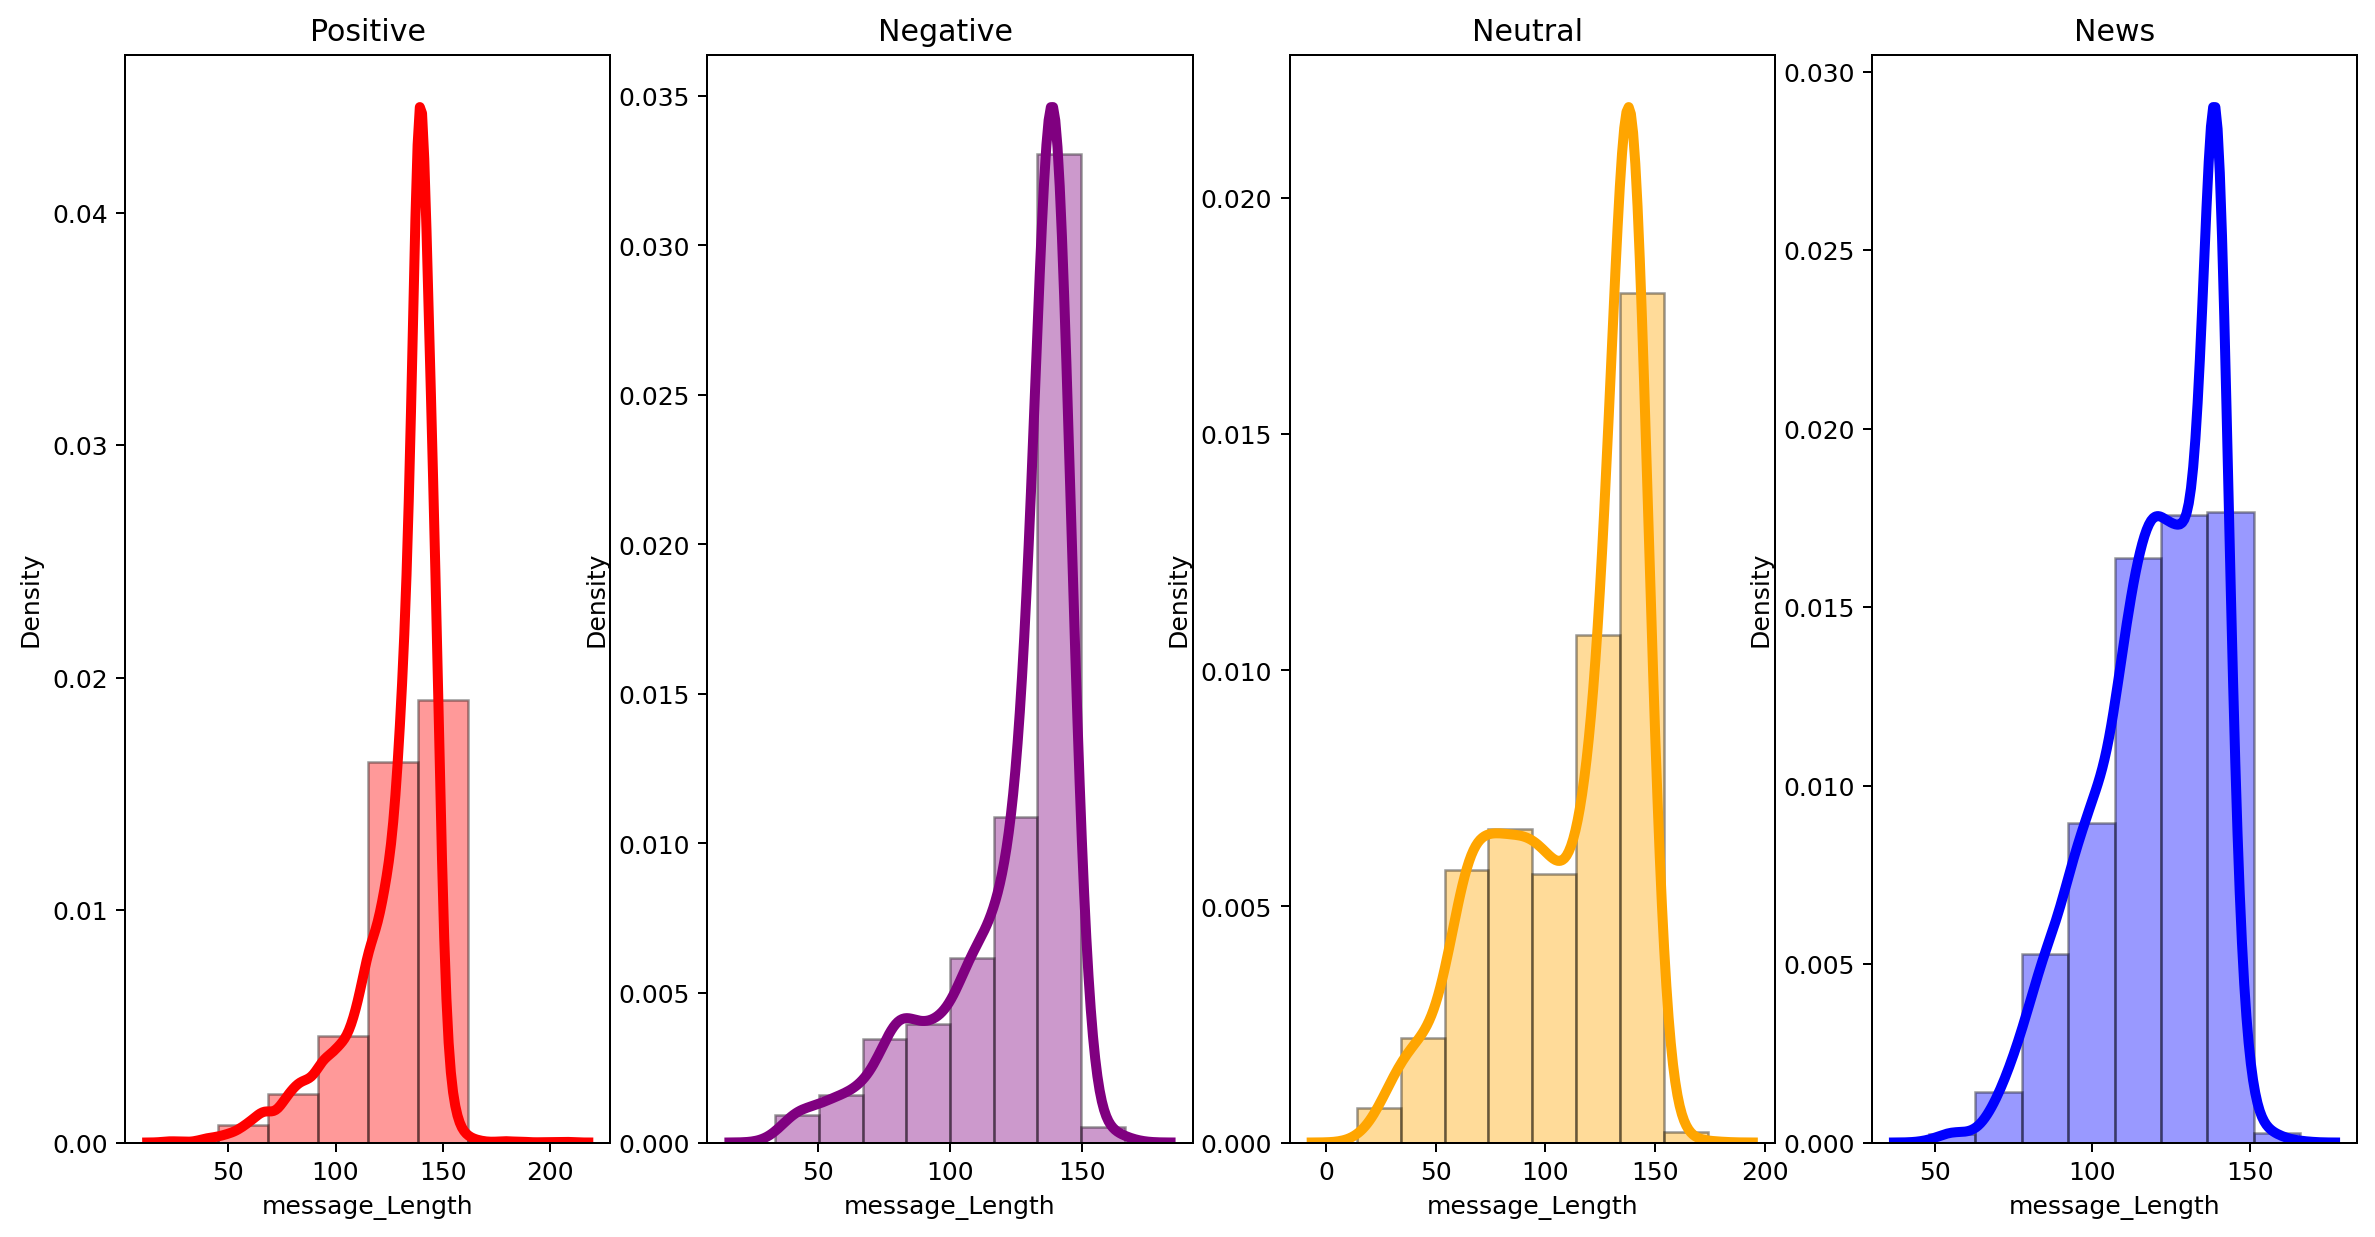

In [13]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))
#For Positive 
sns.distplot(train_data[train_data['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'red', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train_data[train_data['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train_data[train_data['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'orange',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For News
sns.distplot(train_data[train_data['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

#plt.title('Distribution of target labels')
plt.show()

The average length of messages for all sentiments is not suprising as a tweet is only limited to 140 characters. <br>Density contrast between positive and negative sentiments is interesting - positive tweets seem to be shorter. 
Now that we have explored our dataset, we can begin perfoming some analyses on it.

# 5. Exploratory Data Analysis

## 5.1 Data Visualisation

In [19]:
#Making copy of train dataset
working_df = train_data.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]
train_data.head(10)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [20]:
working_df.head(10)

,sentiment,message,tweetid
0,Positive,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Positive,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Positive,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Positive,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,Positive,Worth a read whether you do or don't believe i...,425577
6,Positive,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,Positive,RT @makeandmendlife: Six big things we can ALL...,992717
8,Positive,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,Positive,RT @paigetweedy: no offense… but like… how do ...,260471


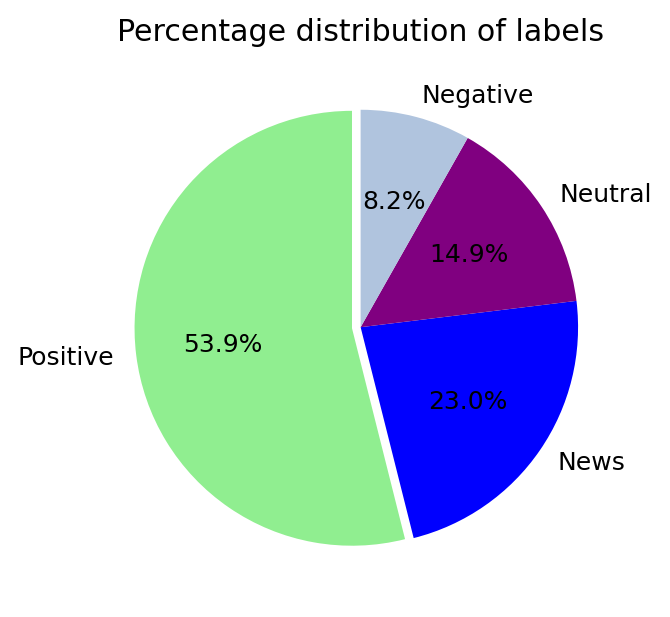

In [16]:
# checking the numerical distribution
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.title('Percentage distribution of labels')
plt.show()

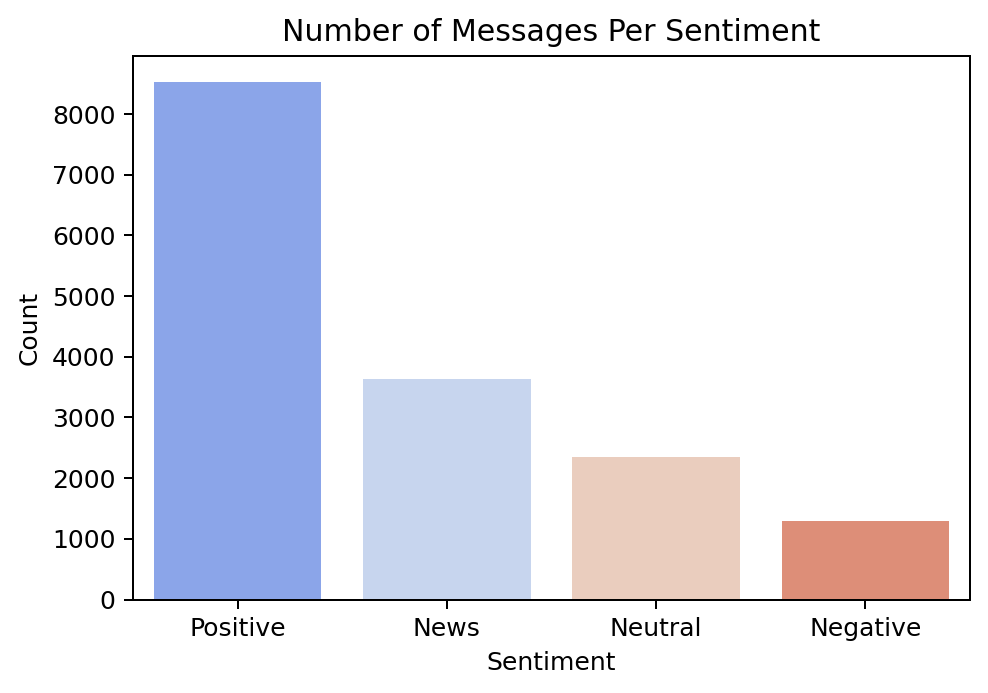

In [17]:
sns.countplot(x='sentiment' ,data = working_df, palette='coolwarm')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

As we noted earlier, there is an imbalance of classes in the dataset, with:
* positive tweets on climate change having the most number of tweets at 53.9% of our dataset. 
* tweets against climate change having the least number of counts (8.2%). 

As such this can lead to a disproportionate ratio of observations in each class, causing problems as most algorithms are designed to maximize accuracy and reduce error. We therefore continue to analyse and evaluate for more insights to be derived from the dataset as we prepared to balance later on in the analysis.

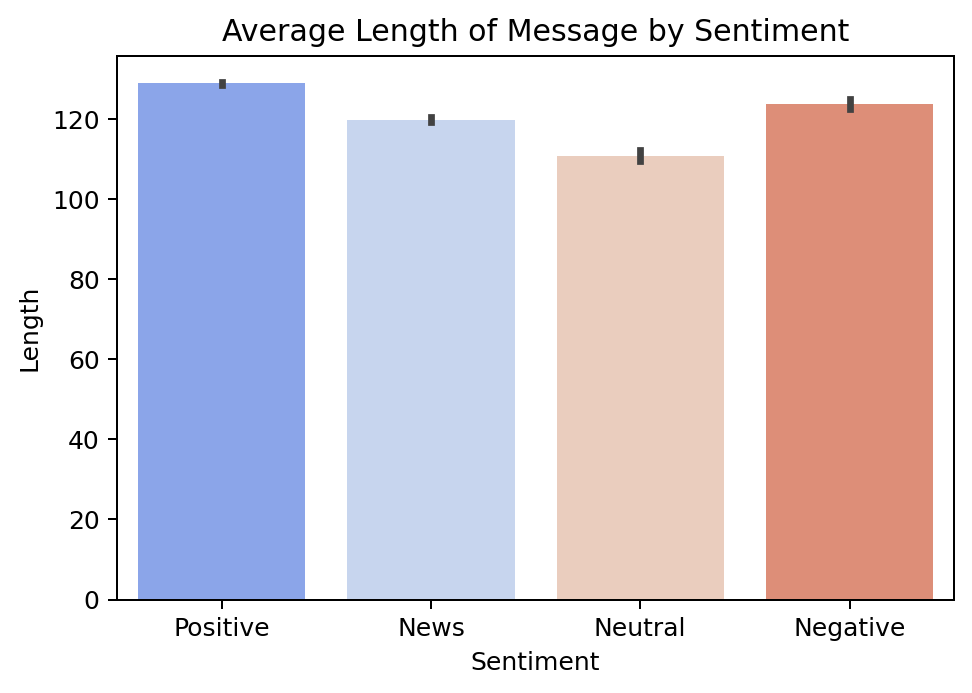

In [18]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='coolwarm')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

The average text length of tweets is rather about equal with each sentiment. 

In [19]:
# Extracting Users in a column
working_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in working_df.message]

# Creating a column of hastags
working_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in working_df.message]

In [20]:
# Generating Counts of users
counts = working_df[['message',
                     'users']].groupby('users',
                                       as_index=False).count().sort_values(by='message', ascending=False)

In [21]:
# Top 5 most popular
counts.head()

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


#### Shocker: Donald trump tweets about climate change a lot 
Stephen Schlegel had the most number of tweets.
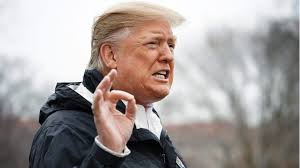

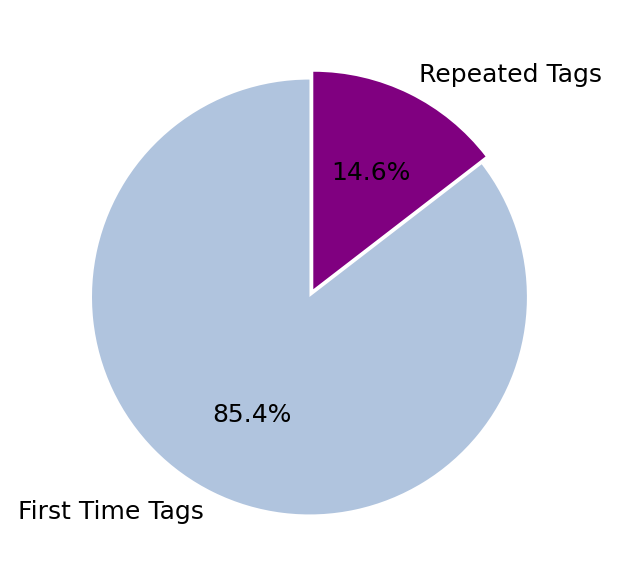

In [22]:
# checking the numerical distribution
values = [sum(np.array(counts['message']) == 1)/len(counts['message']),
          sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0), colors=colors)
plt.show()

In [23]:
repeated_tags_rate = round(sum(np.array(counts['message']) > 1)*100/len(counts['message']), 1)
print(f"{repeated_tags_rate} percent of the data are from repeated tags")

14.6 percent of the data are from repeated tags


In [24]:
first_time_tags = round(sum(np.array(counts['message']) == 1)*100/len(counts['message']), 1)
print(f"{first_time_tags} percent of the data are from first time tags")

85.4 percent of the data are from first time tags


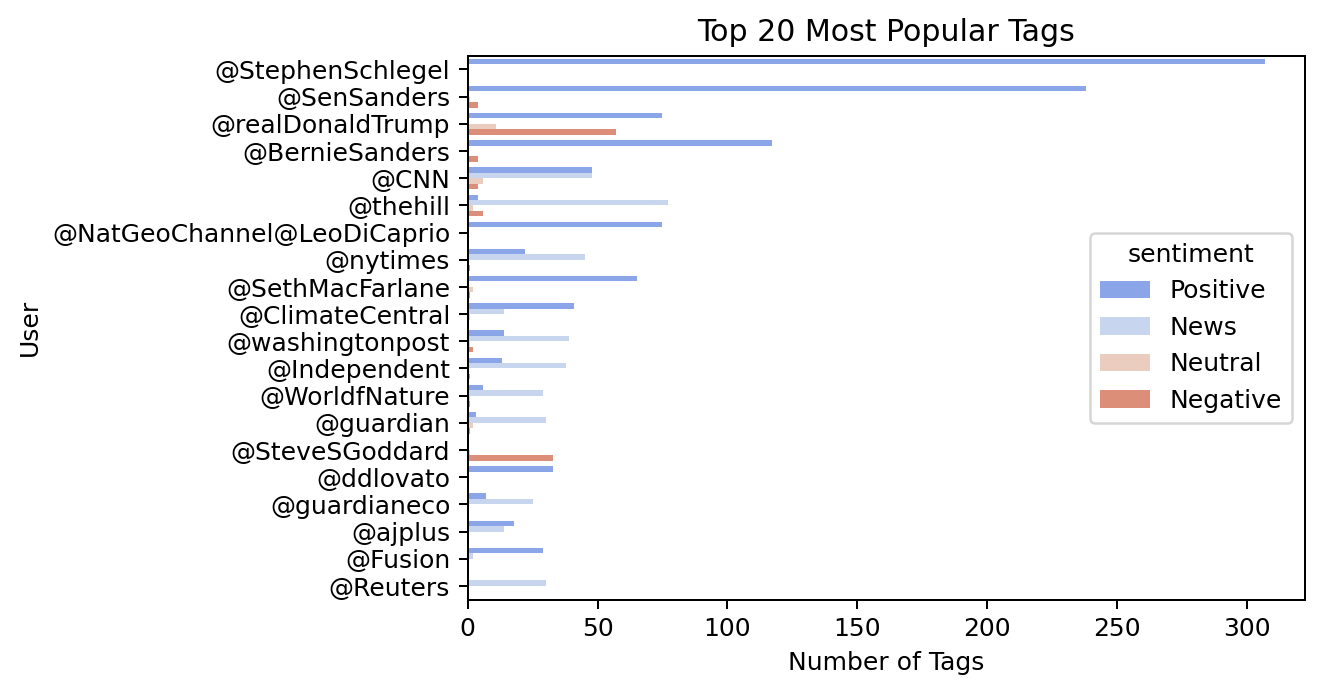

In [25]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=working_df, palette='coolwarm',
              order=working_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()

#### Now that we have had a look at the tweets themselves as well as the users, we now analyse the hastags:

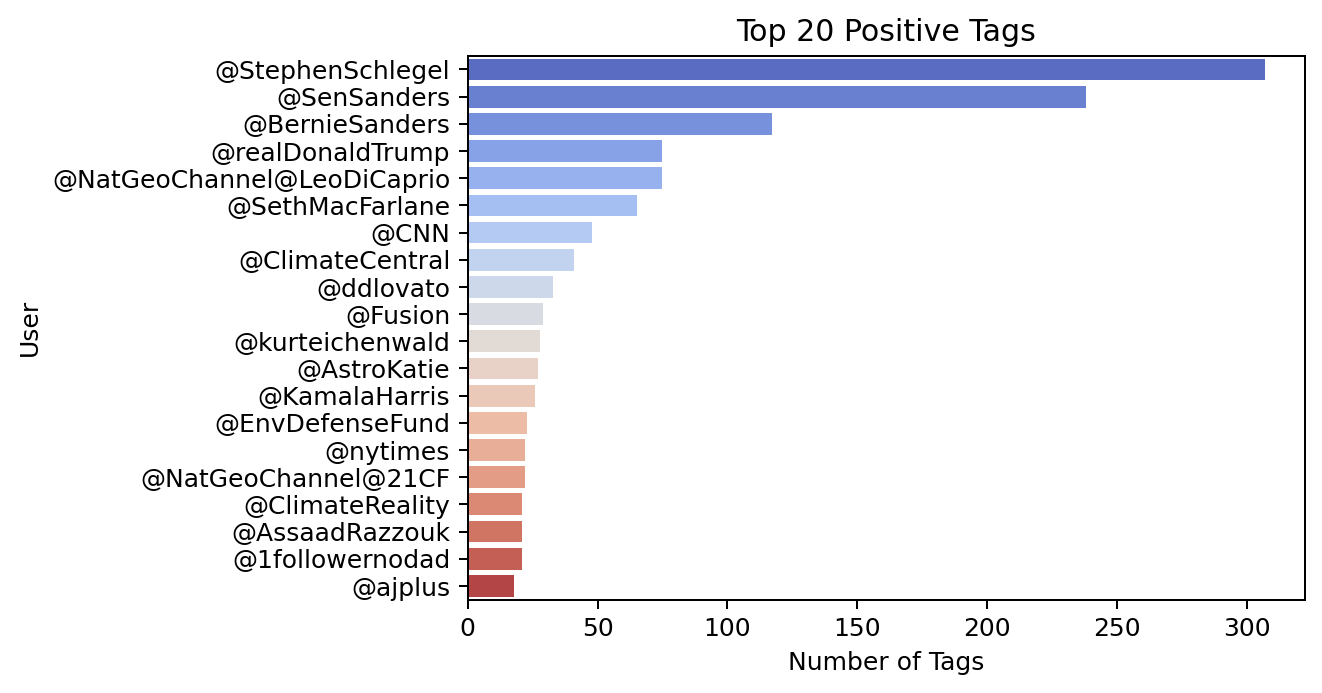

In [26]:
# Analysis of most popular tags, sorted by popularity
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Positive'],
              order=working_df[working_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.show()

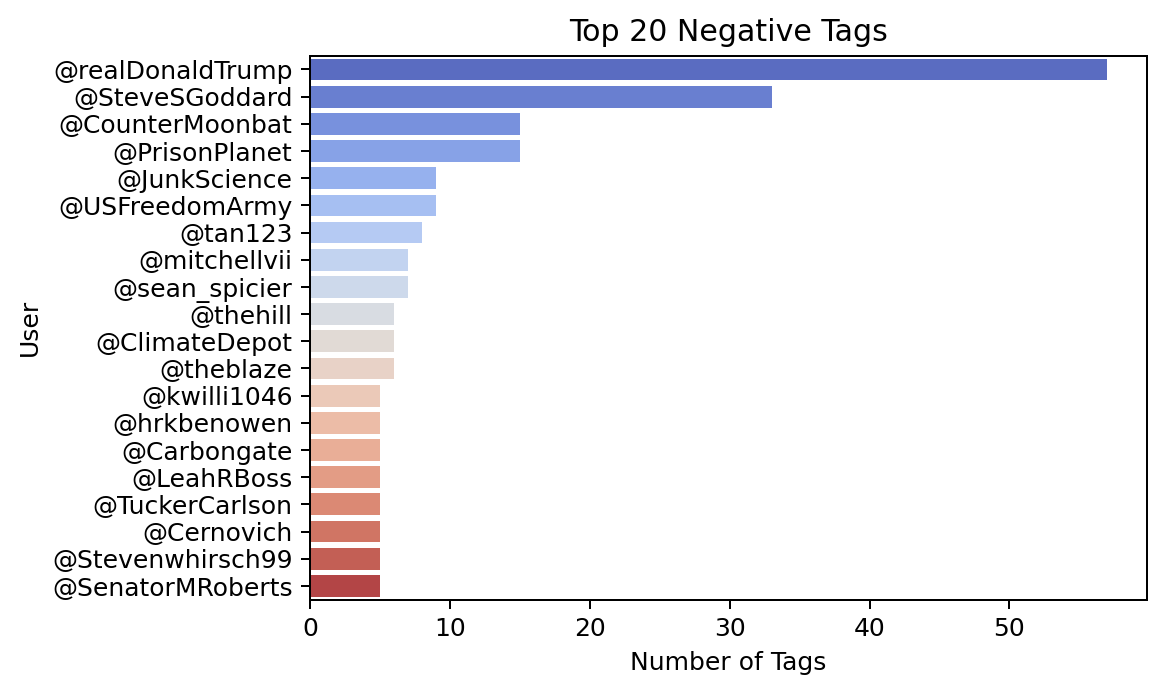

In [27]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Negative'],
              order=working_df[working_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.show()

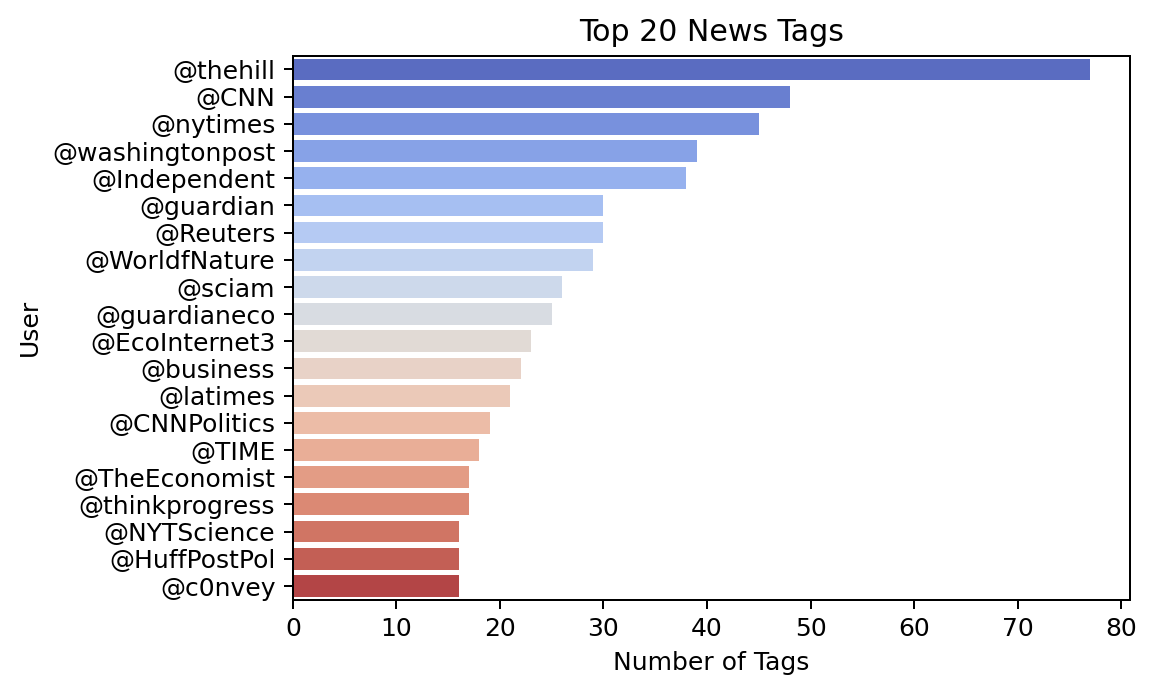

In [28]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'News'],
              order=working_df[working_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.show()

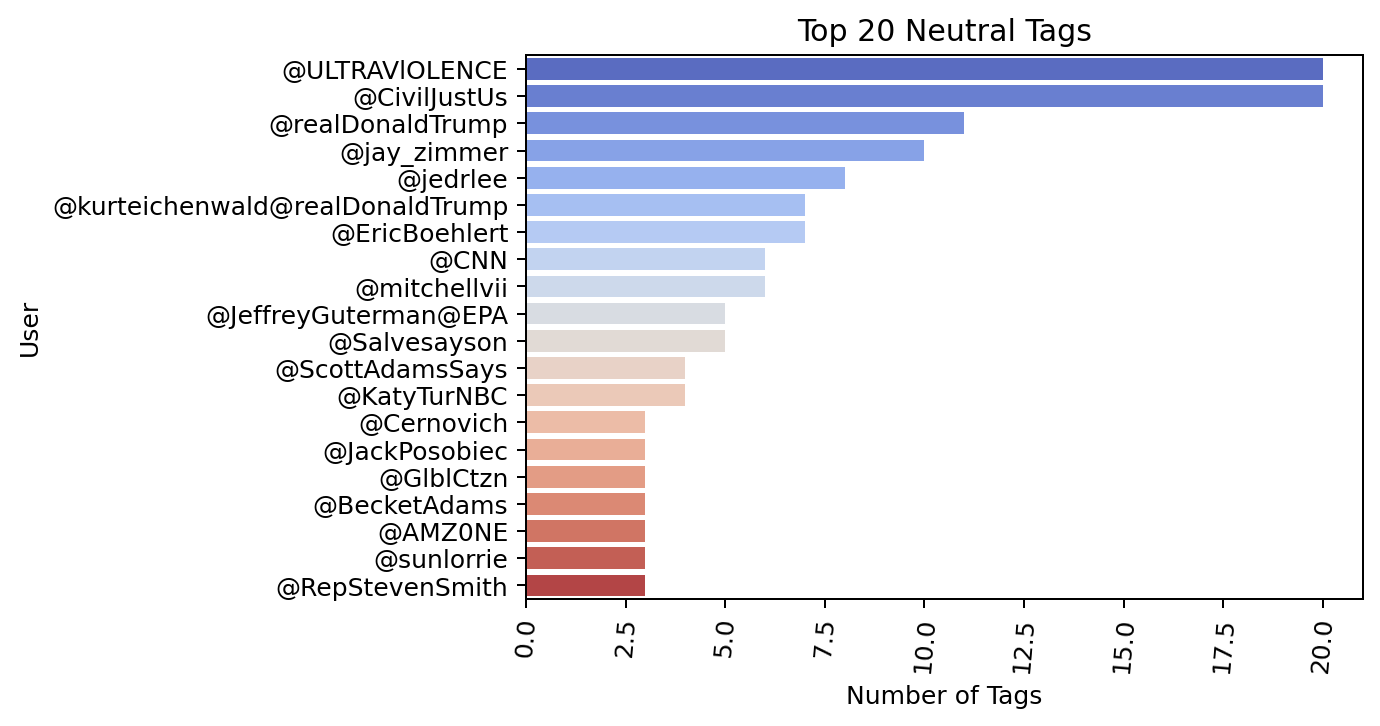

In [29]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Neutral'],
              order=working_df[working_df['sentiment'] == 'Neutral'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Neutral Tags')
plt.xticks(rotation=85)
plt.show()

Comments:
* We can notice from the graphs that Stephen Schlegel had the most number of tags and of positive tags, with reagrd to climate change.
* The most number of negative tags were from Donald Trump, at over 50 tags.
* The most number of news tags were from The Hill news, at over 70 tags.
* Ultra Violence had the most number of neutral tags of over 19 tags. 
* Donald Trump was the user that appeared in almost all the sentiments, with his username appearing in positive tags(over 50 tags), negative tags(over 50 tags) and neutral tags(over 10 tags).

## 5.2. Data Cleaning

Cleaning is the process of detecting and correcting corrupt or inaccurate records from the dataset and identifying incomplete, incorrect, inaccurate or irrelevant parts of the data. We also apply database normalization which is the process of structuring a relational database in accordance with a series of normal forms in order to reduce data redundancy. Applying it will aslo help improve data integrity as it entails organizing the attributes of a dataset to ensure that their dependencies are properly enforced by database integrity constraints. Stemming and Lemmatization are techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.

The following function is an important step in the data mining process. In our case of classification, preprocessing data means; Data cleaning, Fill in missing values, smoothing noisy data and resolving any existing inconsistencies. Success in the steps will then make it possible and some-what easy for us to perform Data integration, Data transformation, Normalization and aggregation as well as Data reduction.


#### The following codes seperate sentiments to create word clouds to the most common words associated with each type of opinion:

In [30]:
df_pos = train_data.loc[train_data['sentiment'] == 1] #positive reviews
df_neg = train_data.loc[train_data['sentiment'] == -1] #negative reviews
df_neu = train_data.loc[train_data['sentiment'] == 0] #neutral reviews
df_new = train_data.loc[train_data['sentiment'] == 2] #news reviews

In [31]:
pos_string = df_pos['message'].str.cat(sep = ' ')
neg_string = df_neg['message'].str.cat(sep = ' ')
neu_string = df_neu['message'].str.cat(sep = ' ')
new_string = df_new['message'].str.cat(sep = ' ')

## 5.3. WordClouds

WordCloud is a visual representation of text data used to display keywords, with the most common keywords diplayed boldly or in larger fonts.

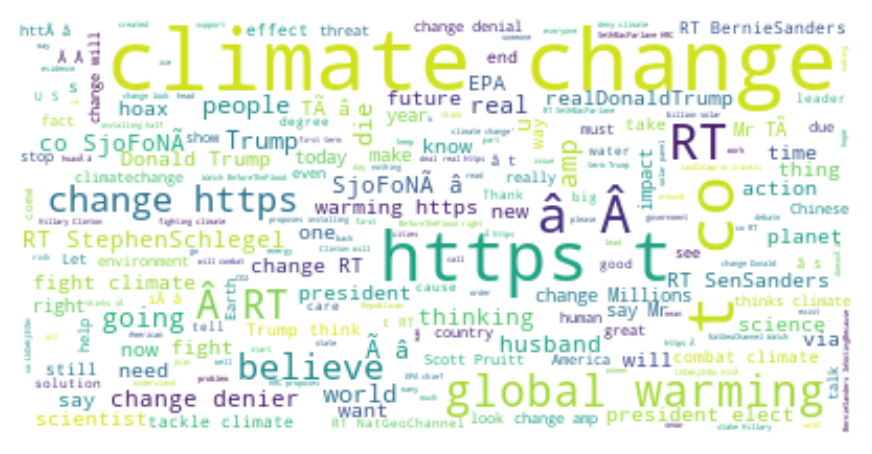

In [32]:
#Positive WordCloud:
pos_cloud = WordCloud(background_color='white').generate(pos_string) #creating and generating word cloud image 
plt.imshow(pos_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

Comments:
* The wordclouds above seem to have common texts used among all the sentiments
*The most common texts used include climate Change, https, global warming, RT and t co.

### 5.4. Feature Engineering and Selection

In [33]:
X_res = train_data['message']
y_res = train_data['sentiment']

### Splitting the data into Train and Validation Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.



In [34]:
# Splitting of Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.01, random_state=42)

# 6. Modelling

# Building Models

Now we are finally ready, and we can train our models

We try for this project 10 models: 

<br> **1) Logistic Regression** 
<br> **2) Linear SVC Model**
<br> **3) SVC Model**
<br> **4) Decision Tree Classifier**
<br> **5) Random Forest Classifier** 
<br> **6) MLP Classifier**
<br> **7) KNeighbors Classifier**
<br> **8) Multinomial NB** 
<br> **9) Complement NB**
<br> **10) SGD Classifier**

We feed the model both with the data (X_train) and the answers for that data (y_train)

## Model Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.

There are so many evaluation metrics to use for regression problem, naming some - Accuracy Score, F1 Score, Precision, Recall etc. However, **Accuracy Score** is the metric for this challenge. 

### Before Oversampling 

In [35]:
# List all the models

classifiers = [LinearSVC(random_state=42),
                SVC(),
                DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators=100, max_depth=1,
                                     random_state=0, class_weight="balanced"),
                MLPClassifier(alpha=1e-5,
                             hidden_layer_sizes=(5, 2),
                             random_state=42),
                LogisticRegression(random_state=5,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1
                                  ),
                KNeighborsClassifier(n_neighbors=5),
                MultinomialNB(),
                ComplementNB(),
                SGDClassifier(loss='hinge',
                             penalty='l2',
                             alpha=1e-3,
                             random_state=42,
                             max_iter=5,
                             tol=None)
               ]

In [36]:
# Creating Function for Model Building

def models_building(classifiers, X_train, y_train, X_val, y_val):
    """
    This function takes in a list of classifiers
    and both the train and validation sets
    and return a summary of F1-score and
    processing time as a dataframe

    Input:
    classifiers: a list of classifiers to train
                 datatype: list
    X_train: independent variable for training
             datatype: series
    y_train: dependent variable for training
             datatype: series
    X_val: independent variable for validation
           datatype: series
    y_val: dependent variable for validation
           datatype: series

    Output:
    model_summary: F1 Score for all the classifiers
                   datatype: dataframe
    """

    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                       max_df=0.95,
                                                       ngram_range=(1, 2),
                                                       analyzer='word')),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time()-start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')


In [37]:
# Execution of the Classifiers
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df.style.background_gradient(cmap='Blues')

COMET ERROR: Failed to extract parameters from estimator


,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
LinearSVC,0.744533,0.798742,0.792909,5.295966
ComplementNB,0.667822,0.761006,0.743122,1.246284
KNeighborsClassifier,0.666610,0.698113,0.700713,1.417187
SVC,0.655616,0.761006,0.736107,283.570447
LogisticRegression,0.632623,0.767296,0.738822,4.353505
DecisionTreeClassifier,0.569600,0.654088,0.649487,9.544528
SGDClassifier,0.440210,0.672956,0.609118,1.308246
MultinomialNB,0.437151,0.691824,0.613552,1.230295
MLPClassifier,0.383137,0.679245,0.589662,176.653808
RandomForestClassifier,0.354645,0.377358,0.369952,1.738002


### Tfid Vectorizer 

In [38]:
# building and fitting the vectorizer
df_train = train_data.copy()
vect = TfidfVectorizer(ngram_range=(1,3), sublinear_tf=True, smooth_idf = True, min_df = 1, max_df = 0.95) 
                       
# transforming the 'clean_txt' column
X_clean_txt = vect.fit_transform(df_train.message) 

In [39]:
# Use these values for 'X' and 'y' in 'train_test_split':
y = df_train['sentiment']
X = df_train['message']

In [40]:
# Splitting the previously defined features and label of your dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_clean_txt, y, test_size=0.2, random_state=42)

###  Over Sampling

In [2]:
# Over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train2, y_train2 = smote.fit_resample(X_clean_txt, y)
print(sorted(Counter(y_train).items()))

NameError: name 'X_clean_txt' is not defined

In [42]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(34120, 311915)
(3164, 311915)
(34120,)
(3164,)


#### Vectorising test data

In [43]:
clean_message_tfidf = vect.transform(test_data['message'])

### 1) Logistic Regression Model

In [44]:
start = timeit.default_timer()

lr = LogisticRegression()

# Train the model
lr.fit(X_train2, y_train2)

pred = lr.predict(X_test2)

# Validate the Model - how well did the model do? 
print('F1 Score is: ', f1_score(y_test2, pred, average='weighted')) 

stop = timeit.default_timer()
execution_time_linear = stop - start

print("Program Executed in "+str(execution_time_linear) + " seconds") # It returns time in seconds

F1 Score is:  0.9644792139544709
Program Executed in 54.99856590000002 seconds


#### Hyperparameter tuning Logistic Regression Model 

In [1]:
 param_grid = [{'penalty': ['l2'],
                'C':[1,2,],
                'solver':['newton-cg'],
                'max_iter':[100, 1000]}]

In [46]:
lmodel = GridSearchCV(lr,param_grid = param_grid, cv = 3, verbose = True, n_jobs = 1) 

In [47]:
lmodel.fit(X_train2, y_train2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
             param_grid=[{'C': [1, 2], 'max_iter': [100, 1000],
                          'penalty': ['l2'], 'solver': ['newton-cg']}],
             verbose=True)

In [48]:
pred1 = lmodel.predict(X_test2)

In [49]:
print('Accuracy Score : ' + str(accuracy_score(y_test2,pred1)))


Accuracy Score : 0.9914664981036663


In [50]:
print('Accuracy Score is: ' + str(accuracy_score(y_test2,pred1)))
print('Precision Score is : ' ,precision_score(y_test2,pred1, average='weighted'))
print('Recall Score is: ',recall_score(y_test2,pred1, average='weighted'))
print('F1 Score is: ', f1_score(y_test2, pred1, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test2,pred1)))


Accuracy Score is: 0.9914664981036663
Precision Score is :  0.9915470683943957
Recall Score is:  0.9914664981036663
F1 Score is:  0.9914835394394355
Confusion Matrix : 
[[ 278    0    0    0]
 [   1  424    0    0]
 [   1    0 1736   18]
 [   0    2    5  699]]


 Logistic Regression (Grid Search) Confusion matrix

### 2) Linear SVC Model  

In [51]:
start = timeit.default_timer()

linear_svc = LinearSVC()

#train the model 
linear_svc.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_svc = linear_svc.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_svc, average='weighted')) 

stop = timeit.default_timer()
execution_time_linear_svc = stop - start

print("Program Executed in "+str(execution_time_linear_svc) + " seconds") # It returns time in seconds

F1 Score is:  0.9993677227225423
Program Executed in 9.89679369999999 seconds


### 3) SVC Model 

In [52]:
start = timeit.default_timer()

svcc = SVC()

#train the model 
svcc.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_svcc = svcc.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_svcc, average='weighted')) 

stop = timeit.default_timer()
execution_time_svc = stop - start

print("Program Executed in "+str(execution_time_svc) + " seconds") # It returns time in seconds

F1 Score is:  0.9984190861933933
Program Executed in 3917.5028512999997 seconds


#### Hyperparameter tuning Support Vector Machine Model 

In [53]:
svc_param = {'C': [0.1, 1 ],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}

In [54]:
svcmodel = GridSearchCV(SVC(), svc_param, refit = True, verbose = 3)

In [55]:
svcmodel.fit(X_train2, y_train2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.351 total time=32.8min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=32.8min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=31.7min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=32.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=31.9min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.527 total time=40.4min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.647 total time=42.1min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=41.8min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=39.5min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.612 total time=35.8min
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.660 total time=39.1min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;,

KeyboardInterrupt: 

In [ ]:
svcpred = svcmodel.predict(X_test2)

In [ ]:
print('Accuracy Score is: ' + str(accuracy_score(y_test2,svcpred)))
print('Precision Score is : ' ,precision_score(y_test2,svcpred, average='weighted'))
print('Recall Score is: ',recall_score(y_test2,svcpred, average='weighted'))
print('F1 Score is: ', f1_score(y_test2, svcpred, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test2,svcpred)))

### 4) Decision Tree Classifier

In [57]:
start = timeit.default_timer()

dtc = DecisionTreeClassifier()

#train the model 
dtc.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_dtc = dtc.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_dtc, average='weighted')) 

stop = timeit.default_timer()
execution_time_dtc = stop - start

print("Program Executed in "+str(execution_time_dtc) + " seconds") # It returns time in seconds

F1 Score is:  0.999052004838008
Program Executed in 238.16123399999924 seconds


### 5) Random Forest Classifier 

In [58]:
start = timeit.default_timer()

rfc = RandomForestClassifier(n_estimators=100, max_depth=2,
                                     random_state=0, class_weight="balanced")

#train the model 
rfc.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_rfc = rfc.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_rfc, average='weighted')) 

stop = timeit.default_timer()
execution_time_rfc = stop - start

print("Program Executed in "+str(execution_time_rfc) + " seconds") # It returns time in seconds

F1 Score is:  0.4736219682284337
Program Executed in 5.006745599996066 seconds


### 6) MLP Classifier  

In [59]:
start = timeit.default_timer()

mlp = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=42)
    
#train the model 
mlp.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_mlp = mlp.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_mlp, average='weighted')) 

stop = timeit.default_timer()
execution_time_mlp = stop - start

print("Program Executed in "+str(execution_time_mlp) + " seconds") # It returns time in seconds

F1 Score is:  0.9993678649172268
Program Executed in 1892.9051563999965 seconds


### 7) KNeighbors Classifier 

In [60]:
start = timeit.default_timer()

knn = KNeighborsClassifier(n_neighbors=5)

#train the model 
knn.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_knn = knn.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_knn, average='weighted')) 

stop = timeit.default_timer()
execution_time_knn = stop - start

print("Program Executed in "+str(execution_time_knn) + " seconds") # It returns time in seconds

F1 Score is:  0.4879871490015944
Program Executed in 38.86960859999817 seconds


### 8) MultinomialNB 

In [61]:
start = timeit.default_timer()

mnb = MultinomialNB()

#train the model 
mnb.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_mnb = mnb.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_mnb, average='weighted')) 

stop = timeit.default_timer()
execution_time_mnb = stop - start

print("Program Executed in "+str(execution_time_mnb) + " seconds") # It returns time in seconds

F1 Score is:  0.948854781996979
Program Executed in 7.315421200008132 seconds


### 9) ComplementNB 

In [62]:
start = timeit.default_timer()

cnb = ComplementNB()

#train the model 
cnb.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_cnb = cnb.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_cnb, average='weighted')) 

stop = timeit.default_timer()
execution_time_cnb = stop - start

print("Program Executed in "+str(execution_time_cnb) + " seconds") # It returns time in seconds

F1 Score is:  0.9539088138571259
Program Executed in 0.3586810999986483 seconds


### 10) SGDClassifier

In [63]:
start = timeit.default_timer()

sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)

#train the model 
sgd.fit(X_train2, y_train2)
#Validate The Model
#Predict on the valication data 
pred_sgd = sgd.predict(X_test2)

print('F1 Score is: ', f1_score(y_test2, pred_sgd, average='weighted'))

stop = timeit.default_timer()
execution_time_sgd = stop - start

print("Program Executed in "+str(execution_time_sgd) + " seconds") # It returns time in seconds

F1 Score is:  0.737646642323847
Program Executed in 1.9385847999947146 seconds


## 6.2. Hyperparameter Tuning on Performing Models

### 2) Linear SVC Model -tuning

In [64]:
# SVC linear Gridsearch
vect=TfidfVectorizer(min_df=2,max_df=0.95,ngram_range=(1, 2),analyzer='word')
X_train_tfidf=vect.fit_transform(X_train)
X_val_tfidf=vect.transform(X_val)

parameters = {'kernel':['linear'],
              'C':[0.25,1.0],
              'gamma': [1,2]}

                   
SVClinear = SVC()
HP_SVC = GridSearchCV(SVClinear, parameters)
HP_SVC.fit(X_train_tfidf,y_train) # fitting the model
y_pred_svc = HP_SVC.predict(X_val_tfidf)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_svc))
print('F1_score: ',round(metrics.f1_score(y_val, y_pred_svc, average = 'weighted'),5))

              precision    recall  f1-score   support

          -1       1.00      0.60      0.75        10
           0       0.81      0.48      0.60        27
           1       0.81      0.89      0.85        92
           2       0.72      0.87      0.79        30

    accuracy                           0.80       159
   macro avg       0.84      0.71      0.75       159
weighted avg       0.81      0.80      0.79       159

F1_score:  0.79018


### 8) Multinomial Naive Bayes -tuning

In [65]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

HP_MNB = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(3, 6),
                                                analyzer='char')),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

HP_MNB.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = HP_MNB.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))


              precision    recall  f1-score   support

          -1       1.00      0.30      0.46        10
           0       0.75      0.33      0.46        27
           1       0.75      0.87      0.81        92
           2       0.68      0.87      0.76        30

    accuracy                           0.74       159
   macro avg       0.80      0.59      0.62       159
weighted avg       0.76      0.74      0.72       159



## 6.3 Model Selection 

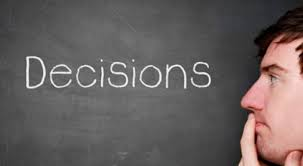

### After Oversampling and Hyperparameter Tuning 

Final Model Evaluation df

In [66]:
fscore_dict = {f'Logistic Regression': round(metrics.f1_score(y_test2, pred, average='weighted'),5),
          f'Decision Tree Classifier': round(metrics.f1_score(y_test2, pred_dtc, average='weighted'),5),
          f'Random Forest Classifier': round(metrics.f1_score(y_test2, pred_rfc, average='weighted'),5),
          f'SVC (Linear)': round(metrics.f1_score(y_test2, pred_svc, average='weighted'),5),
          f'SVC ': round(metrics.f1_score(y_test2, pred_svcc, average='weighted'),5),
          f'K Nearest Neighbours Classifier': round(metrics.f1_score(y_test2, pred_knn, average='weighted'),5),
          f'MLP Classifier': round(metrics.f1_score(y_test2, pred_mlp, average='weighted'),5),
          f'MultinomialNB Classifier': round(metrics.f1_score(y_test2, pred_mnb, average='weighted'),5),
          f'ComplementNB Classifier': round(metrics.f1_score(y_test2, pred_cnb, average='weighted'),5),  
          f'SGDClassifier Classifier': round(metrics.f1_score(y_test2, pred_sgd, average='weighted'),5),  
          f'GridSearchCH SVC(Liniear)': round(metrics.f1_score(y_val, y_pred_svc, average = 'weighted'),5),
          f'GridSearchCH Multinomial NB': round(metrics.f1_score(y_val, y_pred_mnb, average = 'weighted'),5)
          }

final_score = pd.DataFrame(fscore_dict.items(), columns=['Model', 'F-1 Score'])
final_score
ordered_df = final_score.sort_values('F-1 Score', ascending=False)
ordered_df.style.background_gradient(cmap='Blues')

,Model,F-1 Score
3,SVC (Linear),0.999370
6,MLP Classifier,0.999370
1,Decision Tree Classifier,0.999050
4,SVC,0.998420
0,Logistic Regression,0.964480
8,ComplementNB Classifier,0.953910
7,MultinomialNB Classifier,0.948850
10,GridSearchCH SVC(Liniear),0.790180
9,SGDClassifier Classifier,0.737650
11,GridSearchCH Multinomial NB,0.719250


# Conclusion 

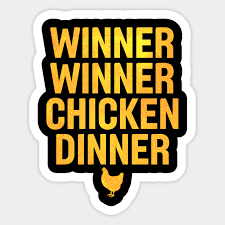

#### Winning model is ..... 

We chose the Linear SVC Model after hyper-parameter tuning which gave us the best F1 scores for the Kaggle competition. 


The high F1 scores for the oversampled models did not extrapolate well to Kaggle (unseen data). They where in all likelyhood overfitted. These we ignore 

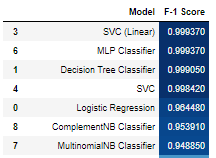

## End Comet session 

In [67]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/munangiwa/general/2d364889502648959a404e83ab6bdc74
COMET INFO:   Parameters:
COMET INFO:     C                                  : 1.0
COMET INFO:     activation                         : relu
COMET INFO:     algorithm                          : auto
COMET INFO:     alpha                              : 0.1
COMET INFO:     average                            : False
COMET INFO:     batch_size                         : auto
COMET INFO:     beta_1                             : 0.9
COMET INFO:     beta_2                             : 0.999
COMET INFO:     bootstrap                          : True
COMET INFO:     break_ties                         : False
COMET INFO:     cache_size                         : 200
COMET INFO:     ccp_alpha                  

COMET INFO:     clf_p                              : 2
COMET INFO:     clf_penalty                        : l2
COMET INFO:     clf_power_t                        : 0.5
COMET INFO:     clf_probability                    : False
COMET INFO:     clf_random_state                   : 42
COMET INFO:     clf_shrinking                      : True
COMET INFO:     clf_shuffle                        : True
COMET INFO:     clf_solver                         : lbfgs
COMET INFO:     clf_splitter                       : best
COMET INFO:     clf_tol                            : 4
COMET INFO:     clf_validation_fraction            : 0.1
COMET INFO:     clf_verbose                        : 0
COMET INFO:     clf_warm_start                     : False
COMET INFO:     clf_weights                        : uniform
COMET INFO:     coef0                              : 0.0
COMET INFO:     criterion                          : gini
COMET INFO:     cv                                 : 5
COMET INFO:     decision_fu

COMET INFO:     tfidf__binary                      : False
COMET INFO:     tfidf__decode_error                : strict
COMET INFO:     tfidf__dtype                       : <class 'numpy.float64'>
COMET INFO:     tfidf__encoding                    : utf-8
COMET INFO:     tfidf__input                       : content
COMET INFO:     tfidf__lowercase                   : True
COMET INFO:     tfidf__max_df                      : 0.9
COMET INFO:     tfidf__max_features                : 1
COMET INFO:     tfidf__min_df                      : 2
COMET INFO:     tfidf__ngram_range                 : (3, 6)
COMET INFO:     tfidf__norm                        : l2
COMET INFO:     tfidf__preprocessor                : 1
COMET INFO:     tfidf__smooth_idf                  : True
COMET INFO:     tfidf__stop_words                  : 1
COMET INFO:     tfidf__strip_accents               : 1
COMET INFO:     tfidf__sublinear_tf                : False
COMET INFO:     tfidf__token_pattern               : (?u)\b\w

# 7. Submission

In [68]:
submission = pd.DataFrame(test_data['tweetid'])
submission['sentiment'] = HP_SVC.predict(vect.transform(test_data['message']))
submission.to_csv('HP_SVC.csv', index=False)

### Save File to Pickle

In [69]:
model_save_path = "HP_SVC.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(HP_SVC, file)